### Recipes 5k

* [Dataset](http://www.ub.edu/cvub/recipes5k/)

* [Original Paper](https://www.researchgate.net/publication/318729535_Food_Ingredients_Recognition_through_Multi-label_Learning)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import process_labels, split_data
from src.classifiers_base import preprocess_df

from transformers import BertTokenizer

from src.multimodal_data_loader import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_base_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'datasets/Recipes5k/'

In [3]:
text_path = os.path.join(PATH, 'labels.csv')
images_path = os.path.join(PATH, 'images')

## Get data

In [4]:
df = pd.read_csv(text_path)
df

,image,class,split,ingredients
0,onion_rings/0_einkorn_onion_rings_hostedLargeU...,onion_rings,val,"yellow onion,flour,baking powder,seasoning sal..."
1,onion_rings/1_crispy_onion_rings_hostedLargeUr...,onion_rings,train,"white onion,panko,cornmeal,ground paprika,onio..."
2,onion_rings/2_onion_rings_hostedLargeUrl.jpg,onion_rings,train,"yellow onion,all-purpose flour,baking powder,l..."
3,onion_rings/3_onion_rings_hostedLargeUrl.jpg,onion_rings,train,"oil,pancake mix,spanish onion"
4,onion_rings/4_onion_rings_hostedLargeUrl.jpg,onion_rings,train,"peanut oil,sweet onion,flour,eggs,celery salt,..."
...,...,...,...,...
4821,chocolate_ice_cream/45_chocolate_ice_cream_hos...,chocolate_ice_cream,train,"dark chocolate,whole milk,unsweetened cocoa po..."
4822,chocolate_ice_cream/46_dark_chocolate_ice_crea...,chocolate_ice_cream,train,"half & half,whole milk,heavy cream,sugar,sea s..."
4823,chocolate_ice_cream/47_the_darkest_chocolate_i...,chocolate_ice_cream,train,"unsweetened cocoa powder,brewed coffee,granula..."
4824,chocolate_ice_cream/48_homemade_chocolate_ice_...,chocolate_ice_cream,train,"unsweetened cocoa powder,sugar,firmly packed b..."


## Data Perparation

In [5]:
# Select features and labels vectors
text_columns = 'ingredients'
image_columns = 'image'
label_columns = 'class'

df = preprocess_df(df, image_columns, images_path)

# Split the data
train_df, test_df = split_data(df)

# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)

100%|██████████| 4826/4826 [00:02<00:00, 2082.37it/s]


Train Shape: (3409, 4)
Test Shape: (783, 4)


In [6]:
# Instantiate tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [7]:
train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns, tokenizer)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

### Models

In [8]:
output_size = len(mlb.classes_)
multilabel = False

Training Early Fusion Model:
The number of parameters of the model are: 210021


STAGE:2023-12-29 23:04:50 113256:113256 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.4572
Epoch 1/15 - Training Time: 120.00 seconds | Inference Time: 25.05 seconds
Epoch 2/15 - Test Accuracy: 0.6117
Epoch 2/15 - Training Time: 103.56 seconds | Inference Time: 25.97 seconds
Epoch 3/15 - Test Accuracy: 0.6692
Epoch 3/15 - Training Time: 109.55 seconds | Inference Time: 25.65 seconds
Epoch 4/15 - Test Accuracy: 0.6986
Epoch 4/15 - Training Time: 111.31 seconds | Inference Time: 25.14 seconds
Epoch 5/15 - Test Accuracy: 0.7165
Epoch 5/15 - Training Time: 108.10 seconds | Inference Time: 25.84 seconds
Epoch 6/15 - Test Accuracy: 0.7331
Epoch 6/15 - Training Time: 110.87 seconds | Inference Time: 25.64 seconds
Epoch 7/15 - Test Accuracy: 0.7446
Epoch 7/15 - Training Time: 106.54 seconds | Inference Time: 25.22 seconds
Epoch 8/15 - Test Accuracy: 0.7637
Epoch 8/15 - Training Time: 108.39 seconds | Inference Time: 25.45 seconds
Epoch 9/15 - Test Accuracy: 0.7625
Epoch 9/15 - Training Time: 107.34 seconds | Inference Time: 24.86 seconds
Epoch 10/1

STAGE:2023-12-29 23:39:03 113256:113256 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2023-12-29 23:39:03 113256:113256 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                   DataParallel.forward         3.99%       80.704s        99.04%     2004.891s        1.995s          1005  
                                         training_batch         0.20%        4.000s        81.07%     1641.115s        2.026s           810  
                                           aten::linear         0.18%        3.562s        61.39%     1242.666s       8.355ms        148740  
                                            aten::addmm        50.08%     1013.830s        60.99%     1234.576s       8.300ms        148740  
      

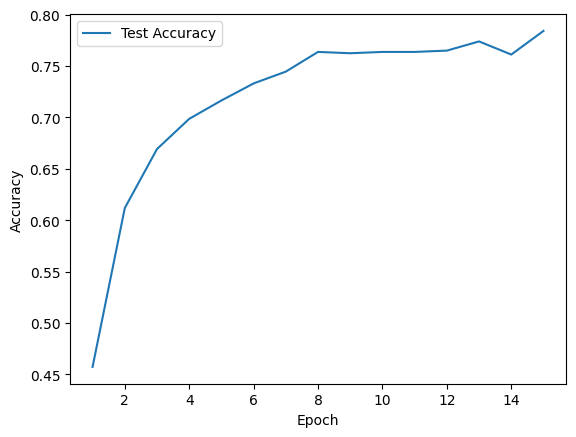

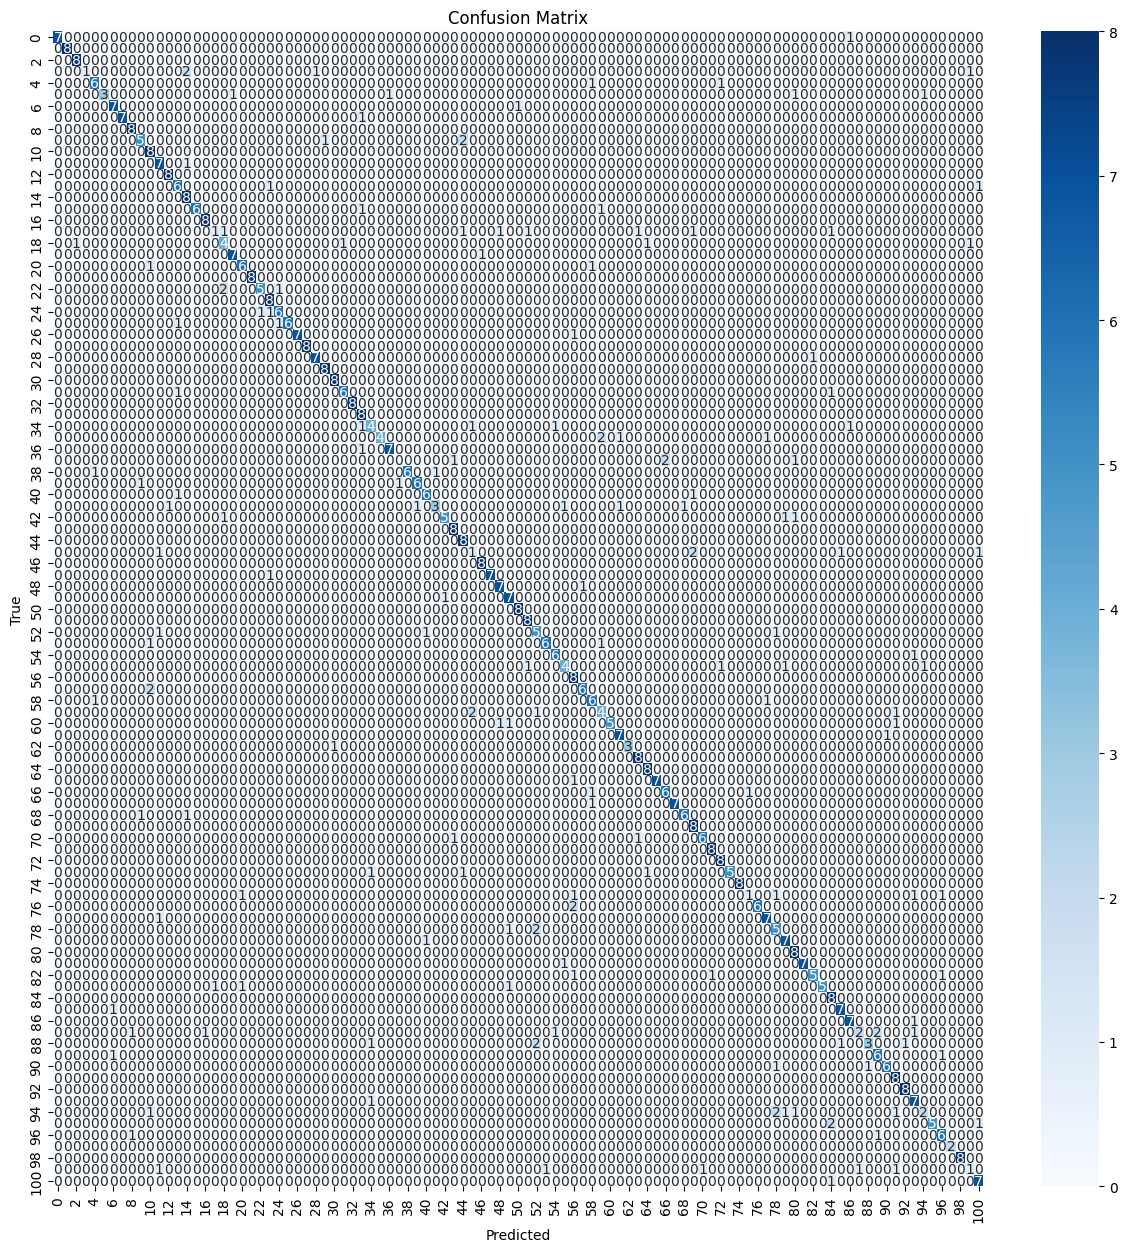

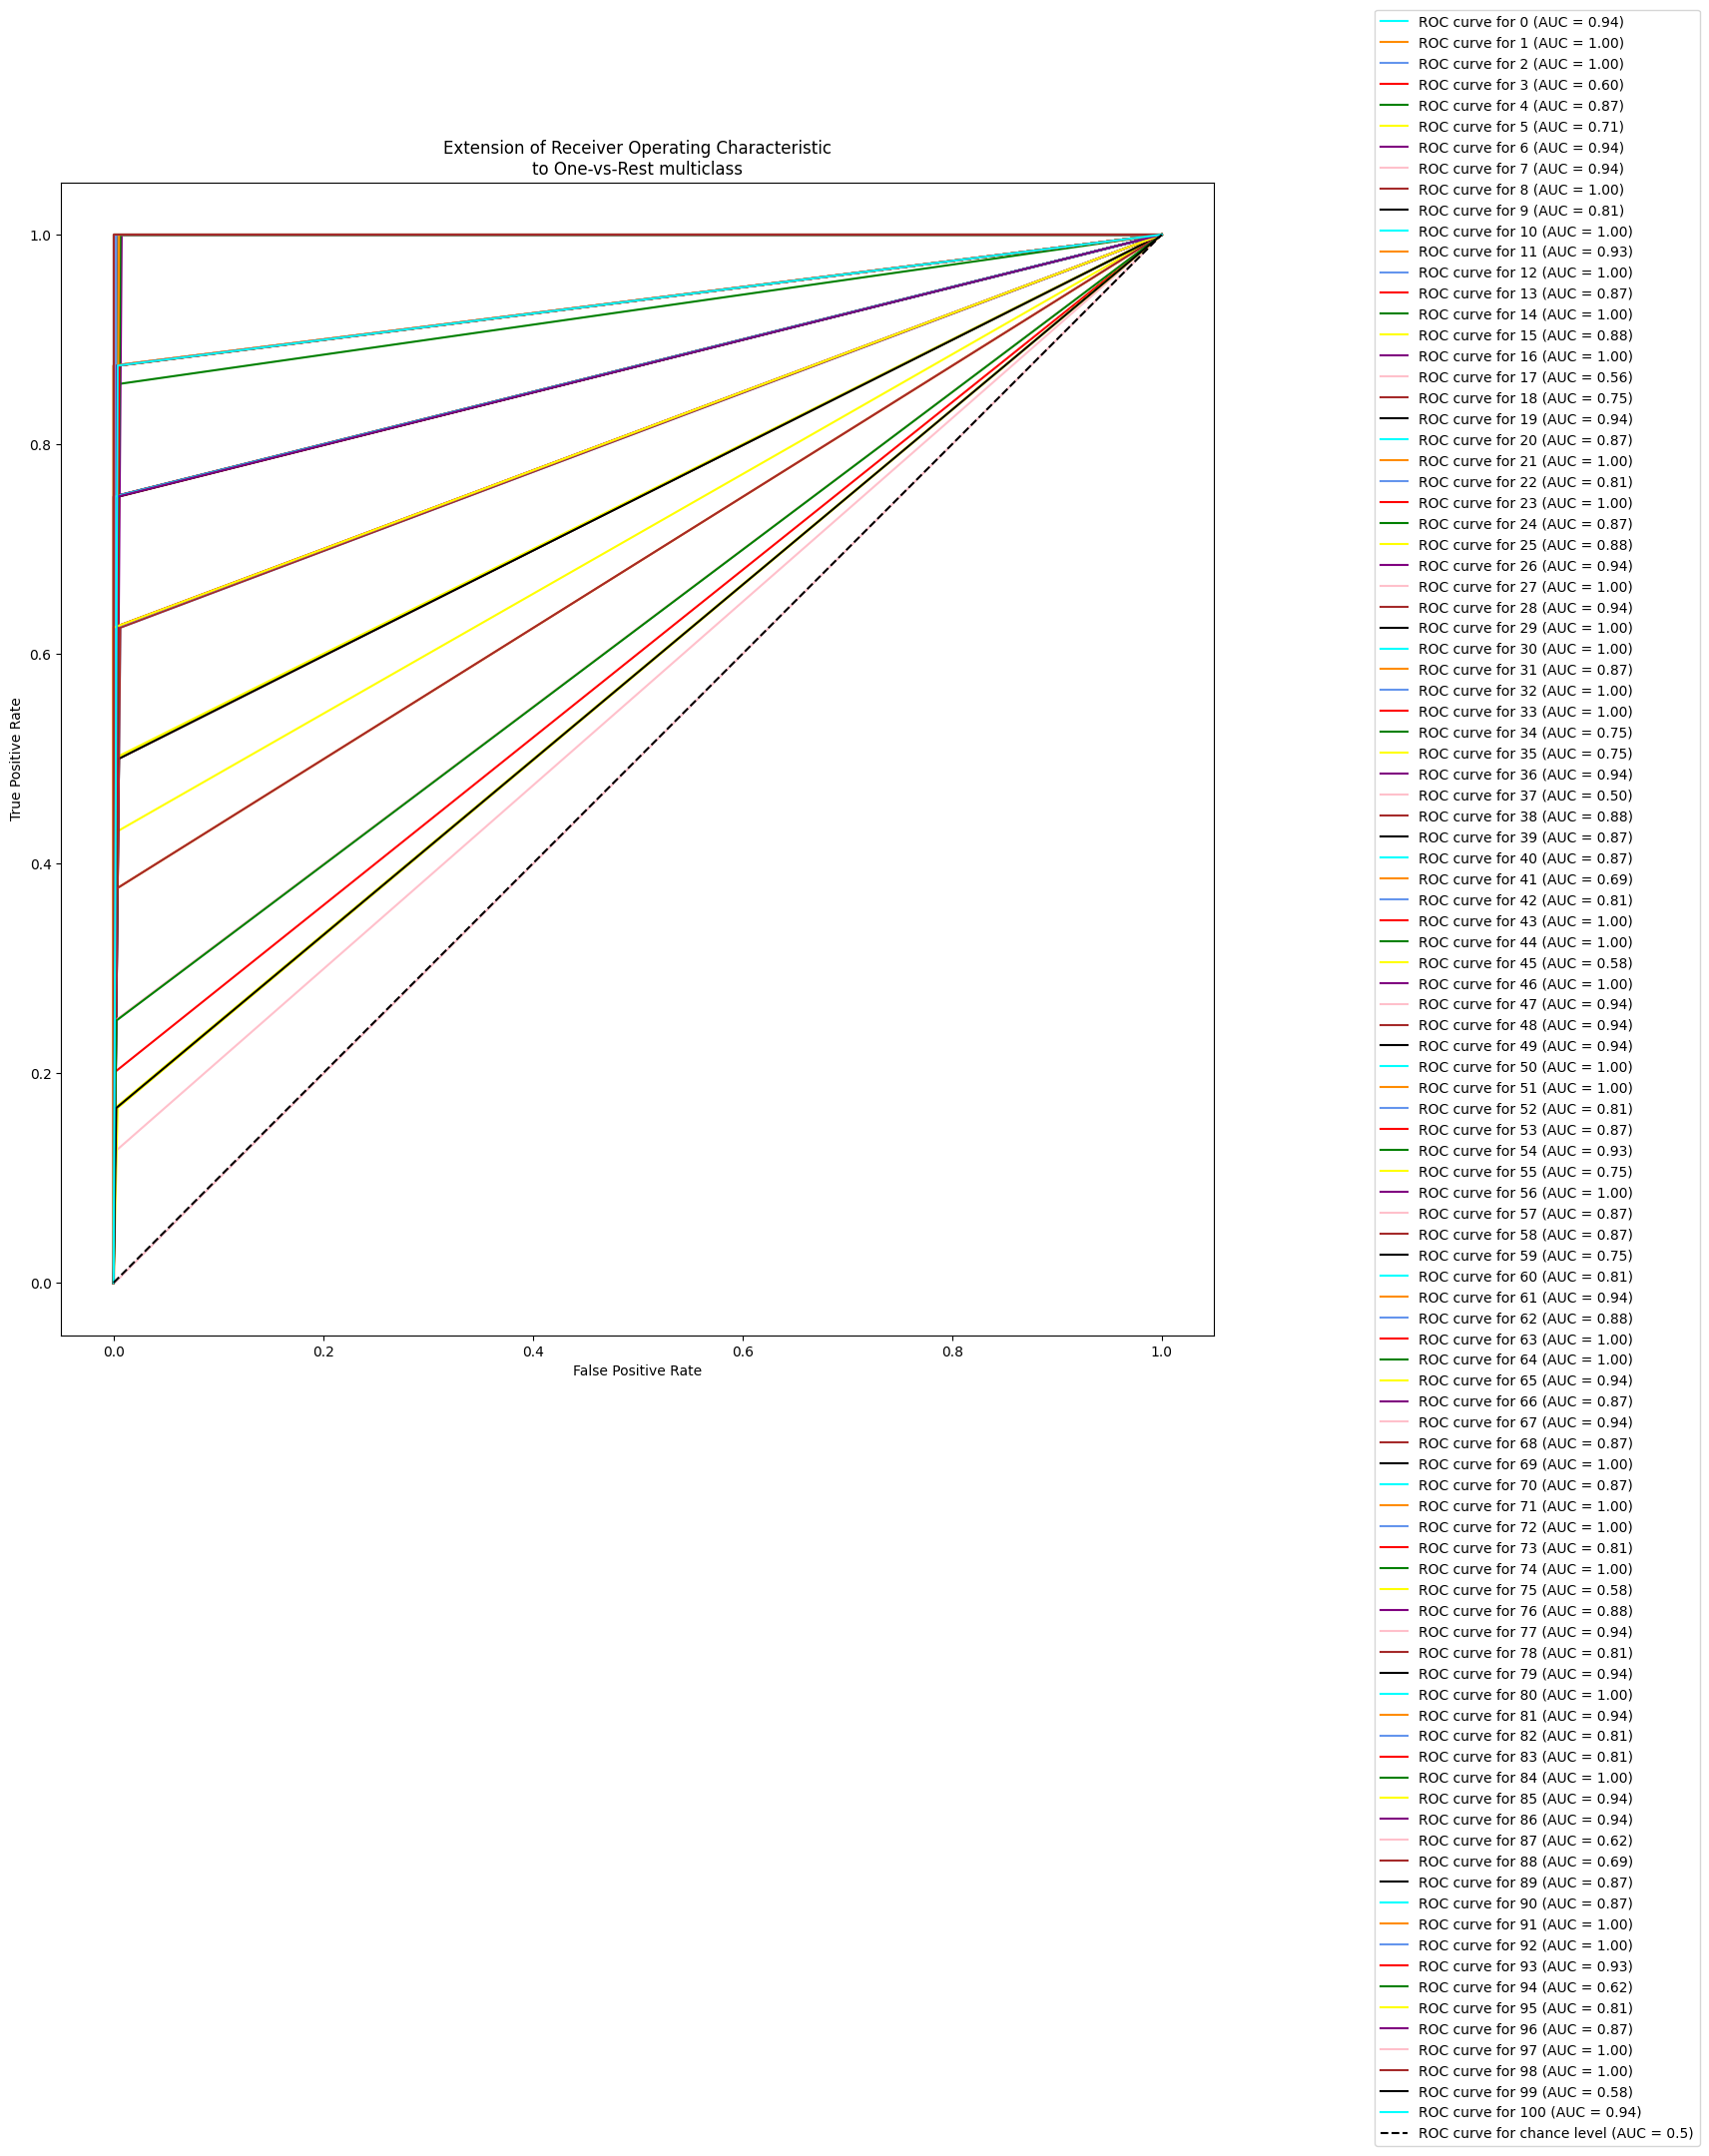

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       1.00      1.00      1.00         8
           2       0.89      1.00      0.94         8
           3       1.00      0.20      0.33         5
           4       0.75      0.75      0.75         8
           5       1.00      0.43      0.60         7
           6       0.78      0.88      0.82         8
           7       1.00      0.88      0.93         8
           8       0.80      1.00      0.89         8
           9       0.71      0.62      0.67         8
          10       0.62      1.00      0.76         8
          11       0.64      0.88      0.74         8
          12       0.89      1.00      0.94         8
          13       0.67      0.75      0.71         8
          14       0.67      1.00      0.80         8
          15       1.00      0.75      0.86         8
          16       0.89      1.00      0.94         8
          17       0.50    

In [9]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, output_size, num_epochs=15, multilabel=multilabel, report=True)

Training Late Fusion Model:
The number of parameters of the model are: 111717


STAGE:2023-12-29 23:46:42 113256:113256 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.4368
Epoch 1/15 - Training Time: 77.40 seconds | Inference Time: 19.93 seconds
Epoch 2/15 - Test Accuracy: 0.5543
Epoch 2/15 - Training Time: 76.47 seconds | Inference Time: 21.13 seconds
Epoch 3/15 - Test Accuracy: 0.6232
Epoch 3/15 - Training Time: 75.46 seconds | Inference Time: 20.95 seconds
Epoch 4/15 - Test Accuracy: 0.6513
Epoch 4/15 - Training Time: 77.35 seconds | Inference Time: 19.20 seconds
Epoch 5/15 - Test Accuracy: 0.6845
Epoch 5/15 - Training Time: 73.73 seconds | Inference Time: 18.85 seconds
Epoch 6/15 - Test Accuracy: 0.7011
Epoch 6/15 - Training Time: 75.23 seconds | Inference Time: 19.57 seconds
Epoch 7/15 - Test Accuracy: 0.7075
Epoch 7/15 - Training Time: 76.37 seconds | Inference Time: 21.52 seconds
Epoch 8/15 - Test Accuracy: 0.7241
Epoch 8/15 - Training Time: 79.04 seconds | Inference Time: 19.97 seconds
Epoch 9/15 - Test Accuracy: 0.7458
Epoch 9/15 - Training Time: 73.14 seconds | Inference Time: 18.90 seconds
Epoch 10/15 - Test 

STAGE:2023-12-30 00:10:54 113256:113256 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2023-12-30 00:10:54 113256:113256 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                   DataParallel.forward         1.87%       26.275s        98.33%     1382.861s        1.376s          1005  
                                         training_batch         0.32%        4.565s        79.19%     1113.687s        1.375s           810  
                                           aten::linear         0.25%        3.529s        76.24%     1072.208s       7.160ms        149745  
                                            aten::addmm        71.07%      999.456s        75.66%     1064.007s       7.105ms        149745  
      

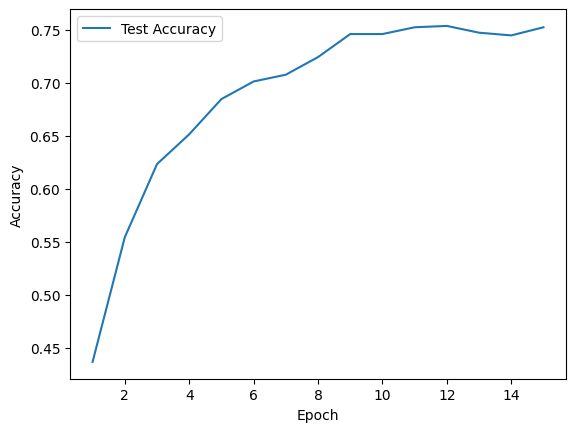

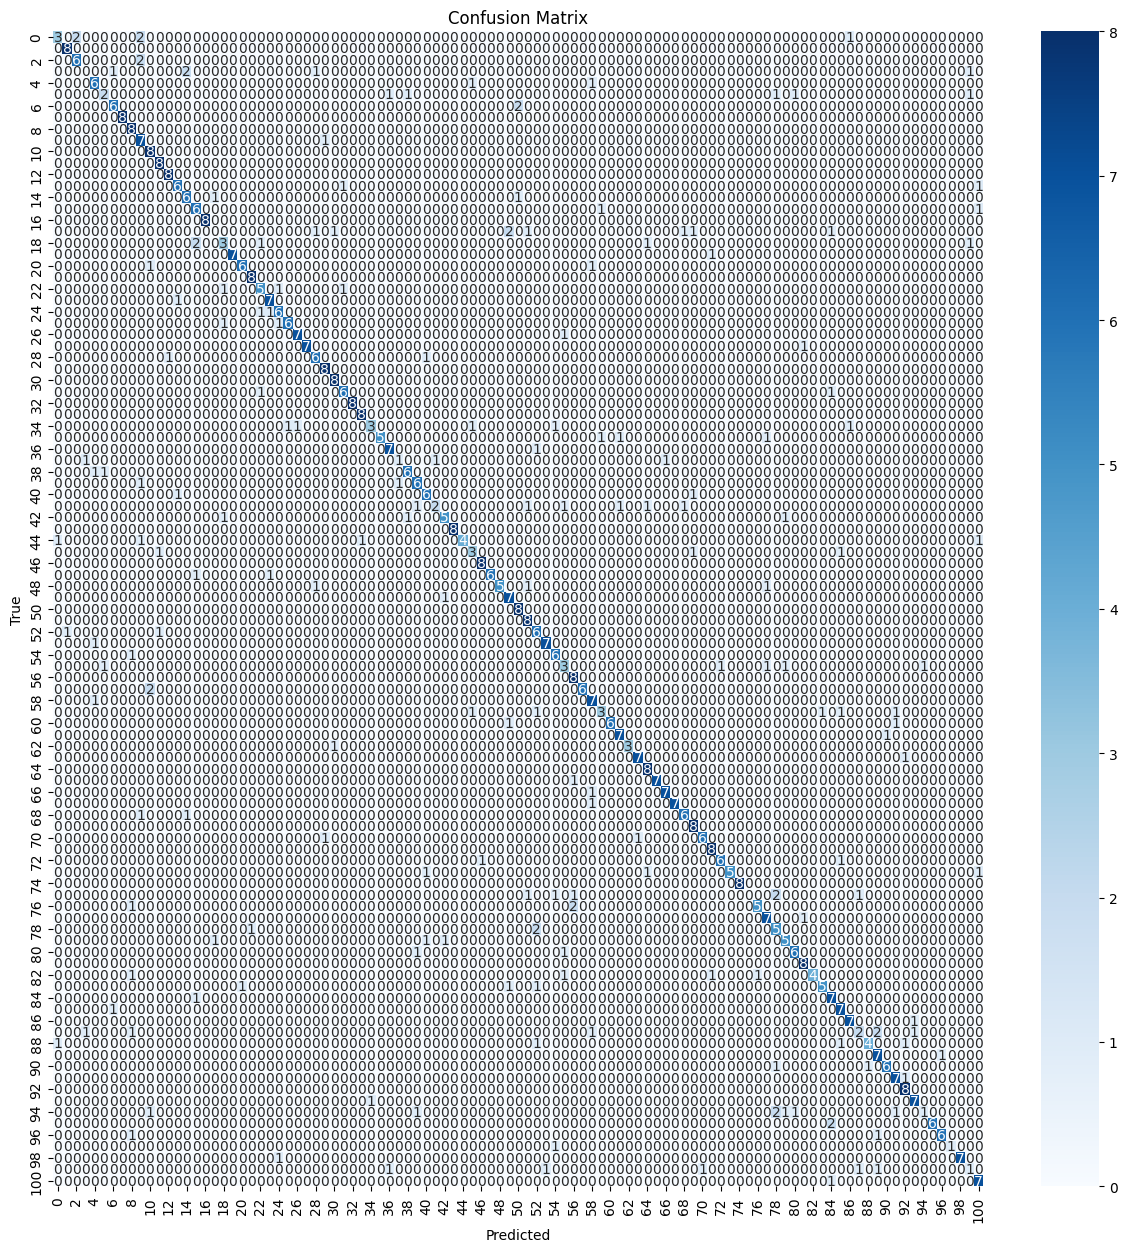

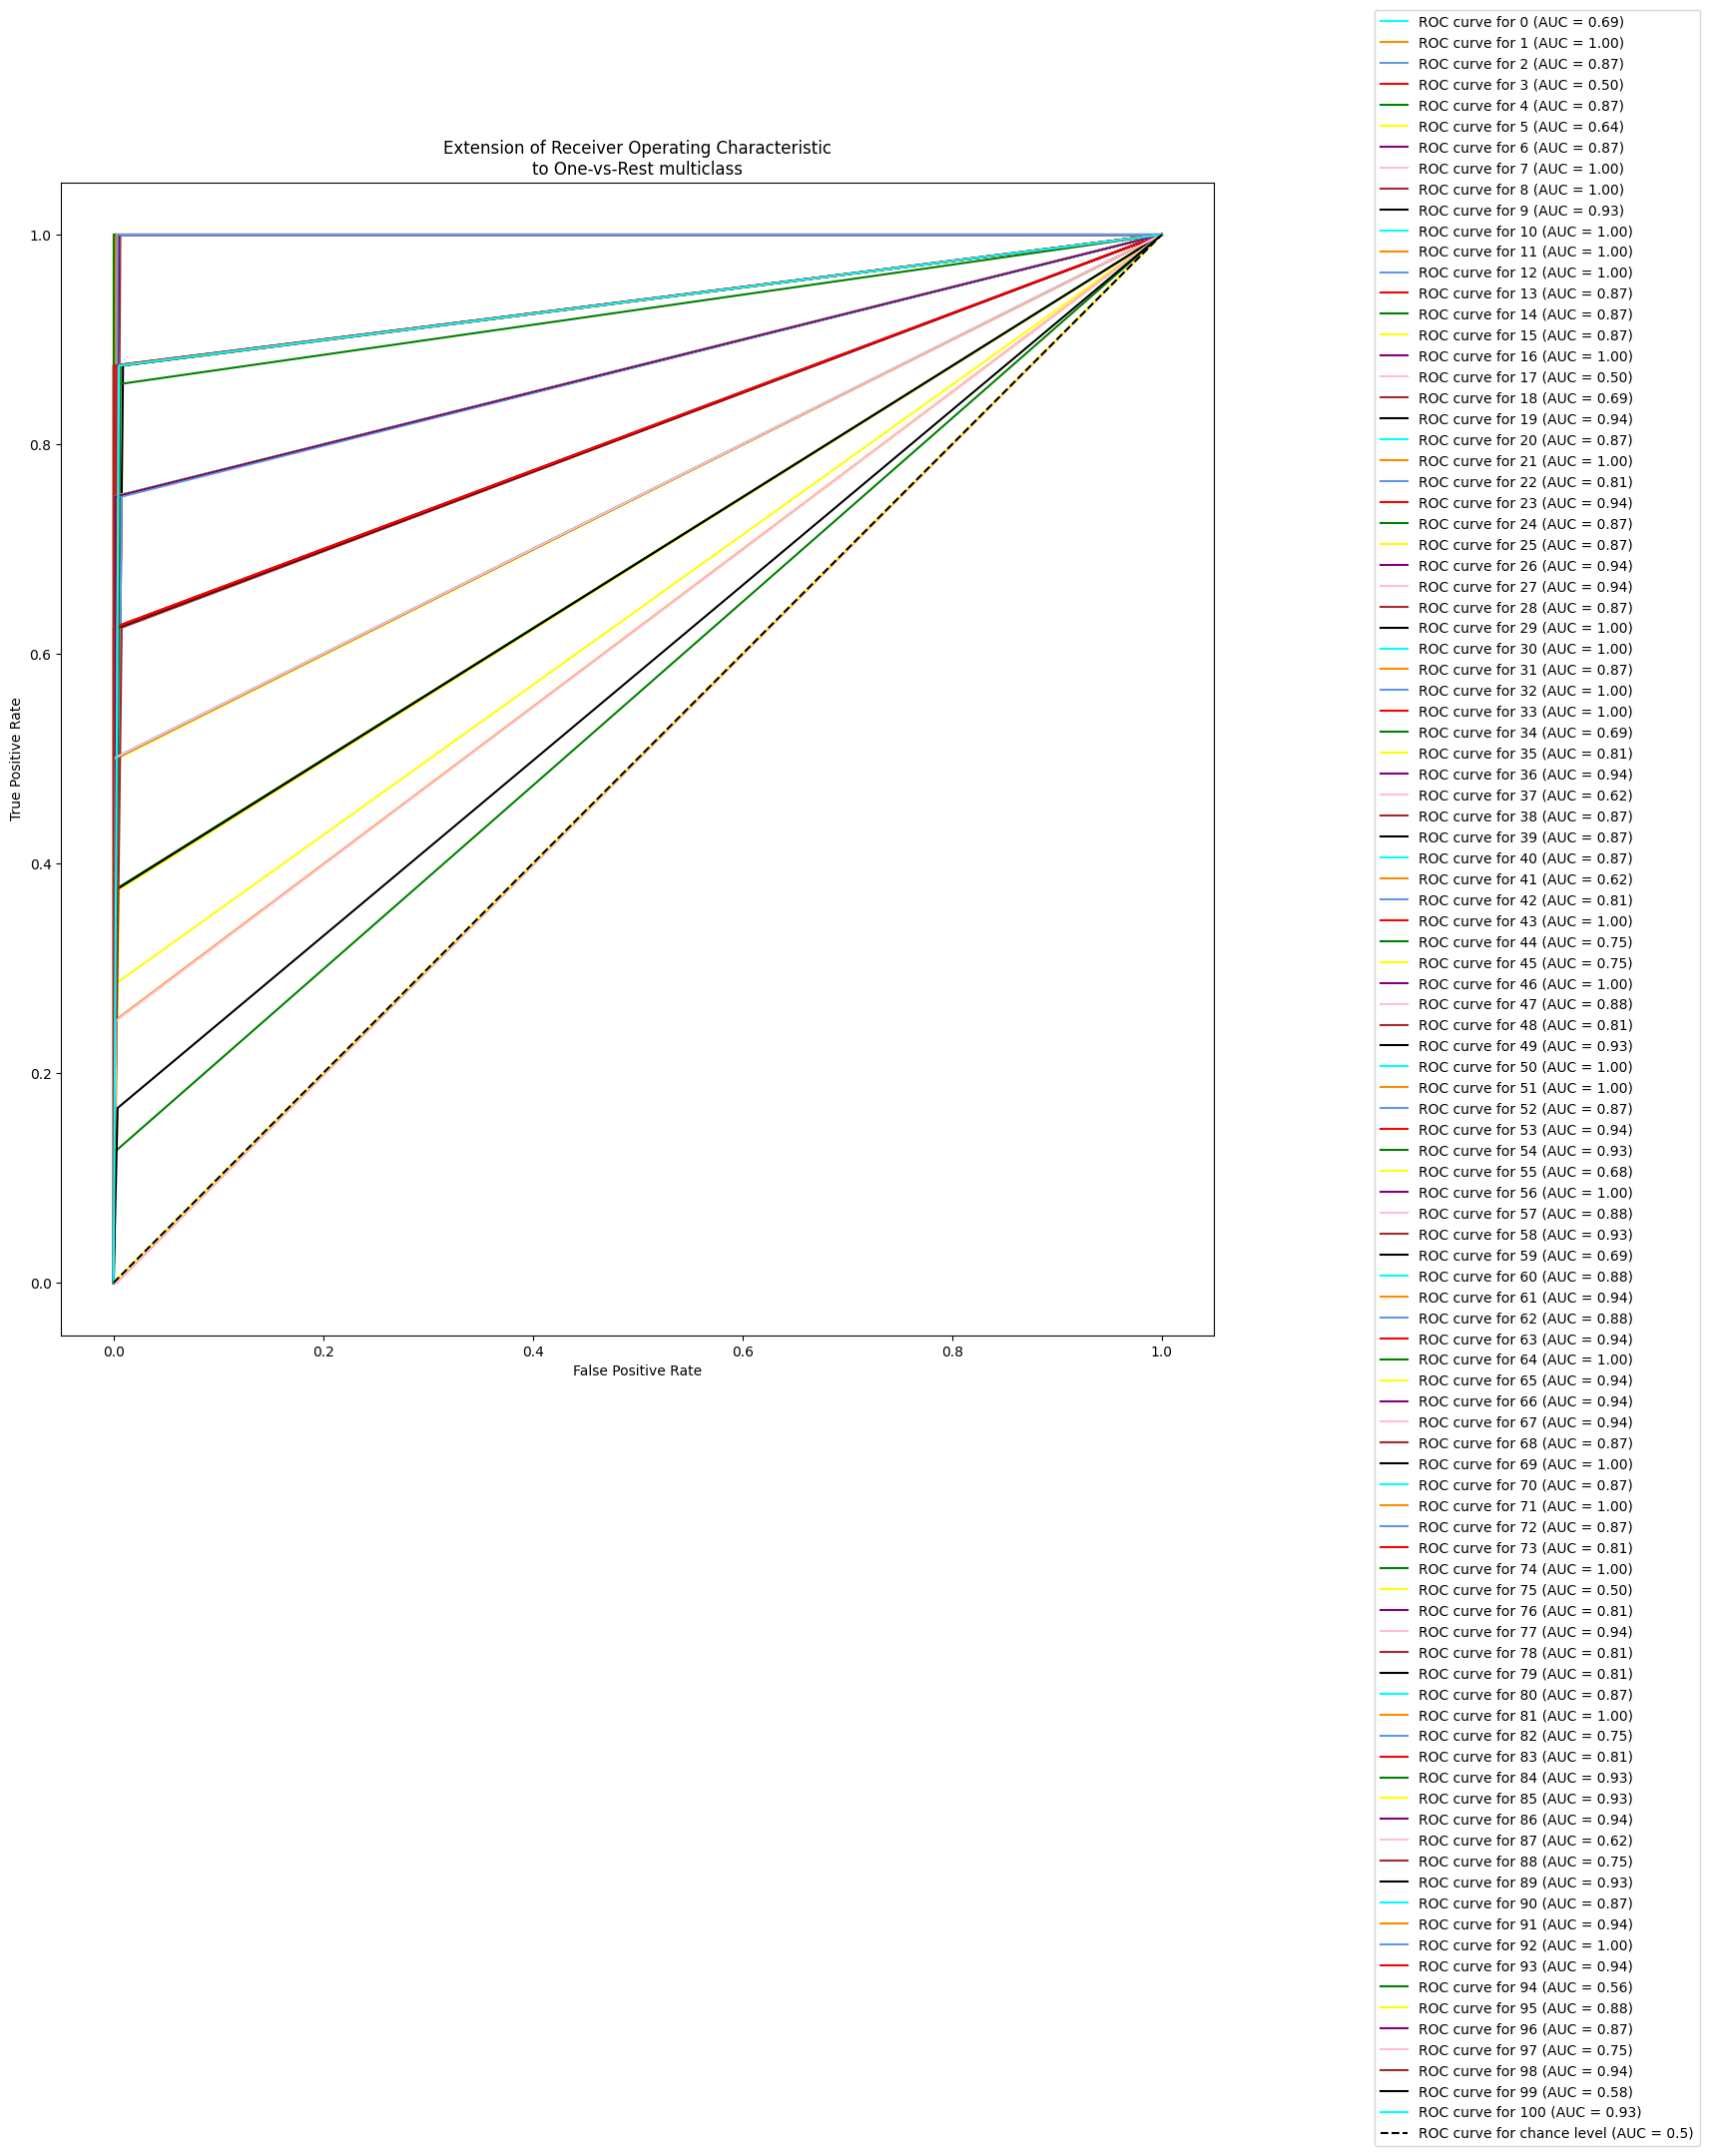

              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.89      1.00      0.94         8
           2       0.75      0.75      0.75         8
           3       0.00      0.00      0.00         5
           4       0.67      0.75      0.71         8
           5       0.50      0.29      0.36         7
           6       0.75      0.75      0.75         8
           7       1.00      1.00      1.00         8
           8       0.62      1.00      0.76         8
           9       0.50      0.88      0.64         8
          10       0.67      1.00      0.80         8
          11       0.80      1.00      0.89         8
          12       0.89      1.00      0.94         8
          13       0.75      0.75      0.75         8
          14       0.67      0.75      0.71         8
          15       0.60      0.75      0.67         8
          16       1.00      1.00      1.00         8
          17       0.00    

In [10]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, output_size, num_epochs=15, multilabel=multilabel, report=True)